In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def policy_iteration(num_states=100, epsilon_threshold=1.0e-5, probability_heads=0.4, discount_factor=1, reward=0):

    states = list(range(0, num_states + 1))
    value_func = np.zeros(num_states + 1)
    policy = [0 for _ in range(num_states + 1)]
    reward_func = list([reward for _ in range(num_states + 1)])
    reward_func[100] = 1.0 # Reward 1.0 when reaching 100 euros

    num_iterations = 1
    while True:
      while True:
          delta = 0
          # going through all states
          for state_index in (range(1, num_states)):
              old_value = value_func[state_index]
              optimal_value_temp = value_func[state_index]

              bet_index = policy[state_index]
              new_value = probability_heads * (
                    reward_func[state_index + bet_index] + discount_factor * value_func[state_index + bet_index]
                ) + (1 - probability_heads) * (
                    reward_func[state_index - bet_index] + discount_factor * value_func[state_index - bet_index]
                )

              value_func[state_index] = new_value
              delta = max(delta, abs(value_func[state_index] - old_value))

          if delta < epsilon_threshold:
              break

      # Policy improvement
      policy_stable = True
      for state_index in (range(1, num_states)):
          old_action = policy[state_index]
          optimal_value_temp = value_func[state_index]

          # going through all possible bets within one state.
          # Taking the min, because the goal is 100 euros. To reach 100 euros with one bet, we only have to bet 50 euros, never more.
          num_possible_bets = min(state_index+1, num_states-state_index+1)
          for bet_index in range(num_possible_bets):
              # value iteration equation
              new_value = probability_heads * (
                    reward_func[state_index + bet_index] + discount_factor * value_func[state_index + bet_index]
                ) + (1 - probability_heads) * (
                    reward_func[state_index - bet_index] + discount_factor * value_func[state_index - bet_index]
                )

              # Change action only if improvement is large enough
              if new_value > (optimal_value_temp + epsilon_threshold):
                  optimal_value_temp = new_value
                  policy[state_index] = bet_index
                  if old_action != policy[state_index]:
                    policy_stable = False
      num_iterations += 1

      # Check if the maximum number of iterations for policy improvement is reached
      if num_iterations > 100:
          break
      if policy_stable:
          break

    print("Number of iterations:", num_iterations)

    # Create a figure and two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Plot data on the first subplot
    ax1.plot(states[:-1], value_func[:-1], 'r-', label='Value Function')
    ax1.set_xlabel('Capital')
    ax1.set_ylabel('Value Function')
    ax1.legend()

    # Plot data on the second subplot
    ax2.bar(states[:-1], policy[:-1], label='Policy')
    ax2.set_xlabel('Capital')
    ax2.set_ylabel('Policy')
    ax2.legend()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the plots
    plt.show()

Number of iterations: 9


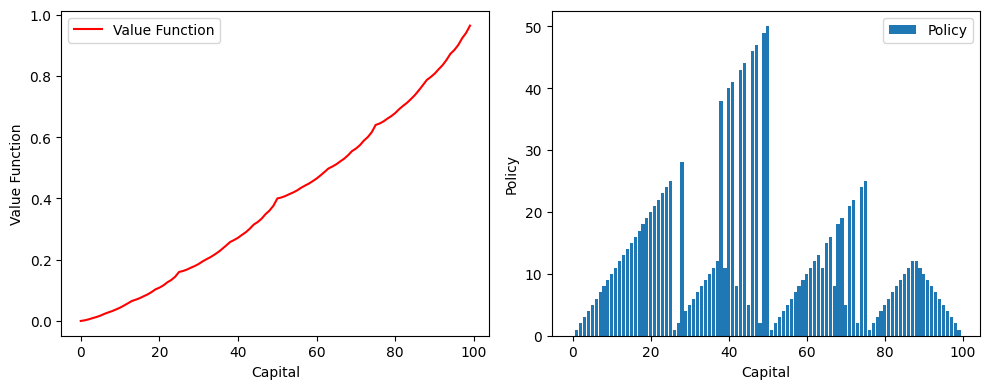

In [ ]:
policy_iteration()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def value_iteration(num_states=100, epsilon_threshold=1.0e-5, probability_heads=0.4, discount_factor=1, reward=0):

    states = list(range(0, num_states + 1))
    value_func = np.zeros(num_states + 1)
    policy = [0 for _ in range(num_states + 1)]
    reward_func = list([reward for _ in range(num_states + 1)])
    reward_func[100] = 1.0 # Reward 1.0 when reaching 100 euros

    num_iterations = 1
    while True:
        policy_improvement_history = []
        # going through all states
        for state_index in (range(1, num_states)):
            old_value = value_func[state_index]
            optimal_value_temp = value_func[state_index]

            # going through all possible bets within one state.
            # Taking the min, because the goal is 100 euros. To reach 100 euros with one bet, we only have to bet 50 euros, never more.
            num_possible_bets = min(state_index+1, num_states-state_index+1)
            for bet_index in range(num_possible_bets):
                # value iteration equation
                #new_value = probability_heads * (reward_func[state_index + bet_index] + value_func[state_index + bet_index]) \
                #         + (1 - probability_heads) * (reward_func[state_index - bet_index] + value_func[state_index - bet_index])
                new_value = probability_heads * (
                    reward_func[state_index + bet_index] + discount_factor * value_func[state_index + bet_index]
                ) + (1 - probability_heads) * (
                    reward_func[state_index - bet_index] + discount_factor * value_func[state_index - bet_index]
                )

                # Change action only if improvement is large enough
                if new_value > (optimal_value_temp + epsilon_threshold):
                    optimal_value_temp = new_value
                    value_func[state_index] = new_value
                    policy[state_index] = bet_index

            # Keeping track of policy improvement
            policy_improvement_this_state = abs(value_func[state_index] - old_value)
            policy_improvement_history.append(policy_improvement_this_state)

        # Stop iteration if not a single improvement was large enough of all the bets tested for this state
        if (max(policy_improvement_history) < epsilon_threshold):
            break
        num_iterations += 1

        # stopping this early before convergence
        if num_iterations == 100:
          break

    print("Number of iterations:", num_iterations)

    # Create a figure and two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Plot data on the first subplot
    ax1.plot(states[:-1], value_func[:-1], 'r-', label='Value Function')
    ax1.set_xlabel('Capital')
    ax1.set_ylabel('Value Function')
    ax1.legend()

    # Plot data on the second subplot
    ax2.bar(states[:-1], policy[:-1], label='Policy')
    ax2.set_xlabel('Capital')
    ax2.set_ylabel('Policy')
    ax2.legend()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the plots
    plt.show()

Number of iterations: 11


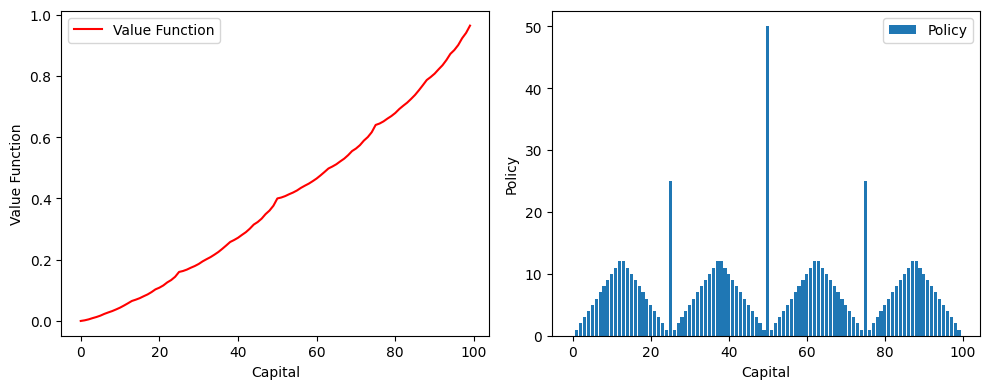

In [ ]:
value_iteration()

Varying Probability Heads

Probability for heads: 0.1

Policy Iteration
Number of iterations: 8


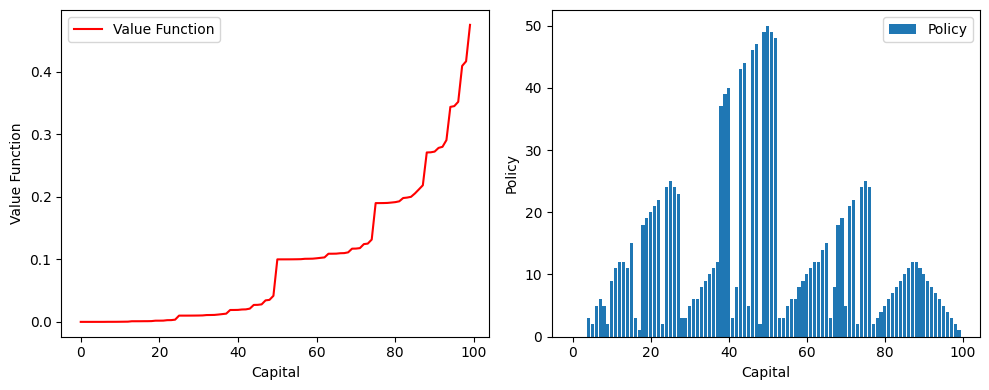

Value Iteration
Number of iterations: 6


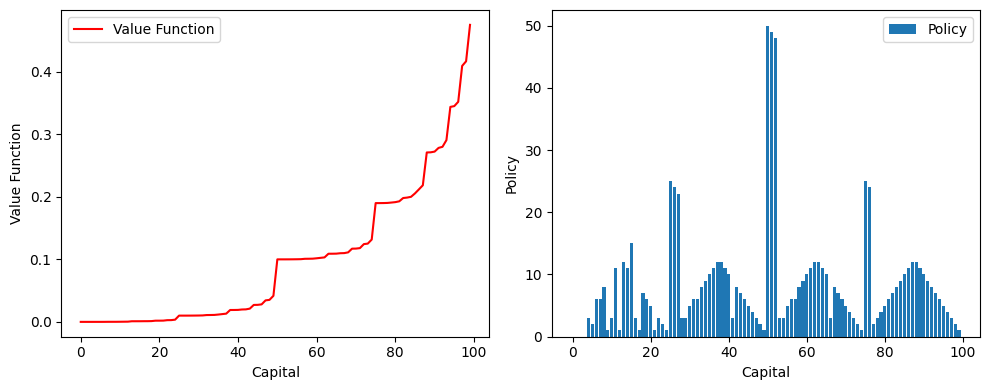

Probability for heads: 0.2

Policy Iteration
Number of iterations: 9


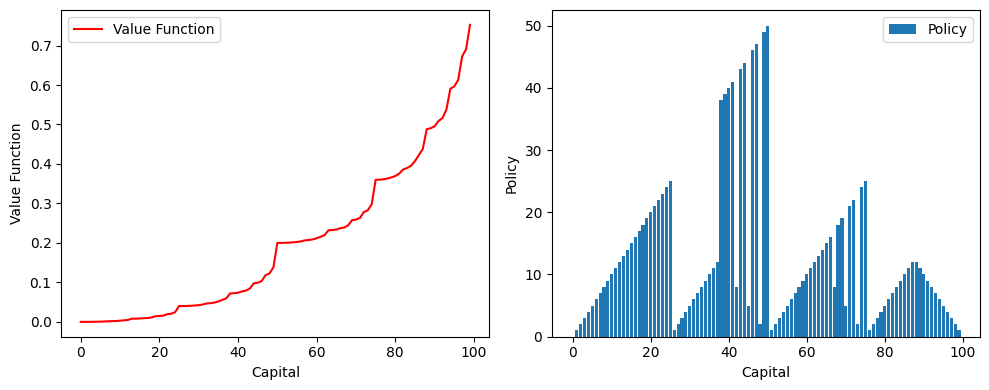

Value Iteration
Number of iterations: 8


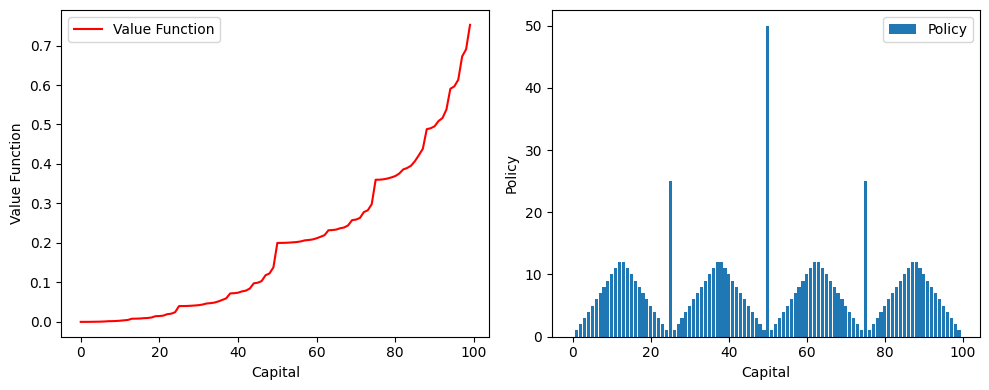

Probability for heads: 0.3

Policy Iteration
Number of iterations: 9


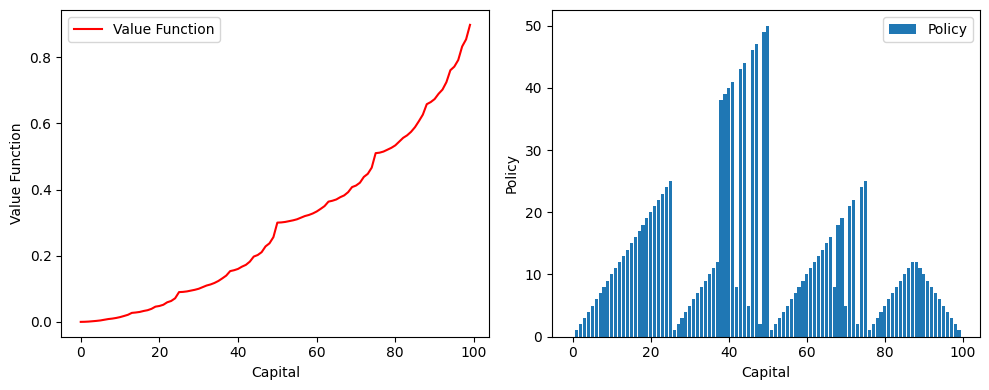

Value Iteration
Number of iterations: 10


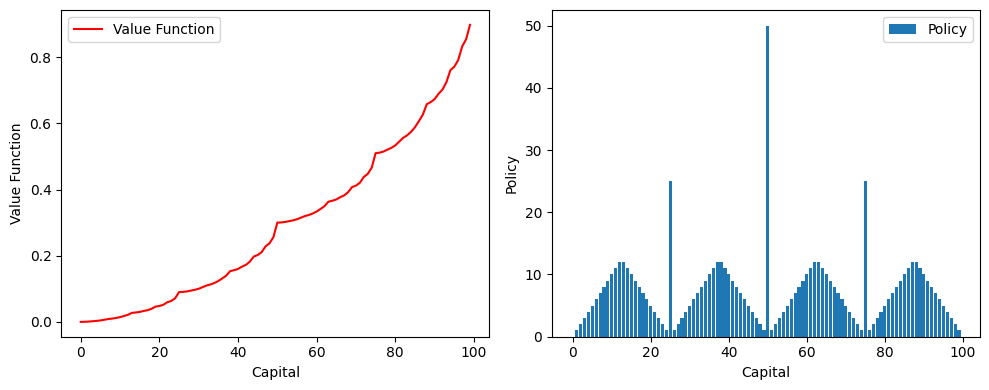

Probability for heads: 0.4

Policy Iteration
Number of iterations: 9


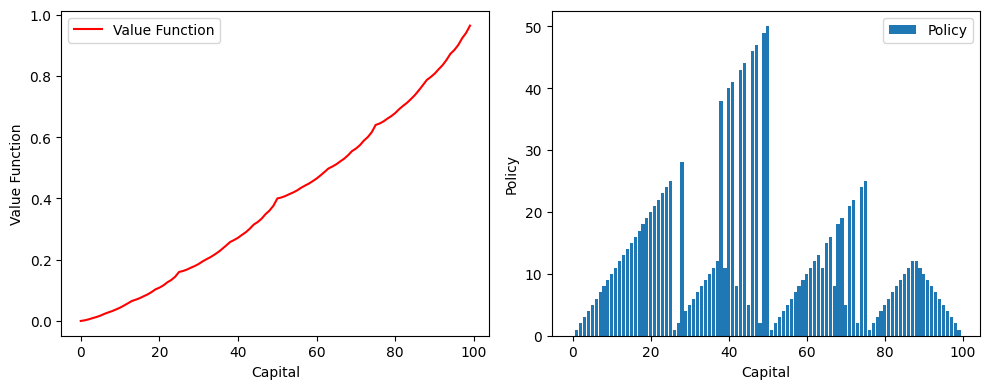

Value Iteration
Number of iterations: 11


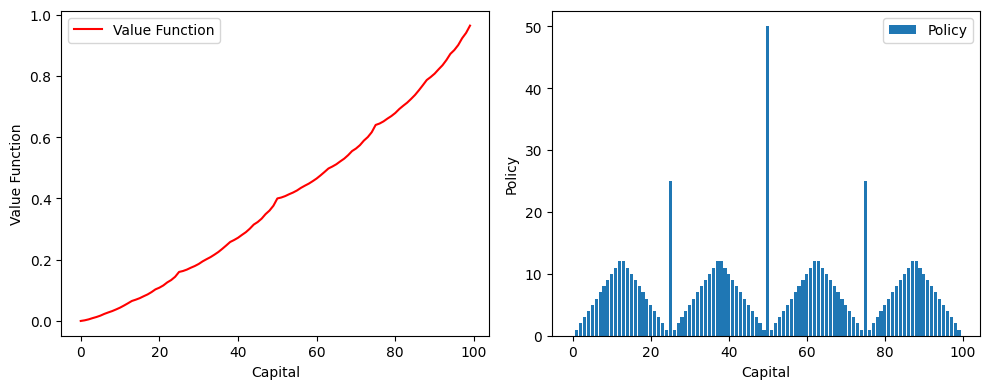

Probability for heads: 0.5

Policy Iteration
Number of iterations: 9


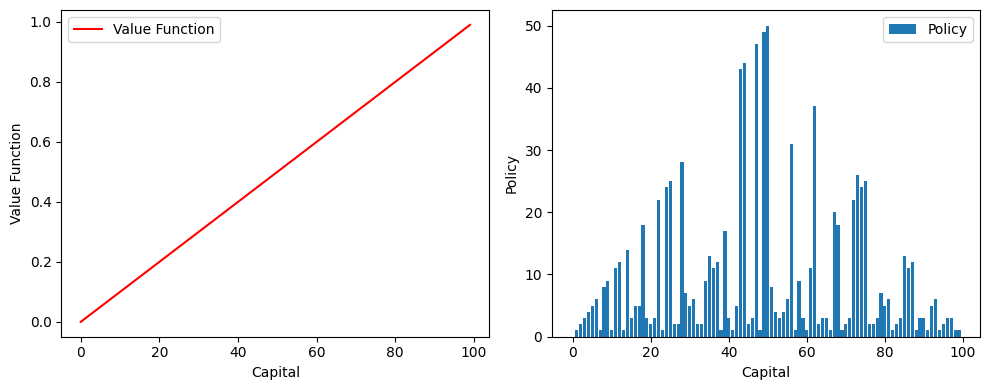

Value Iteration
Number of iterations: 10


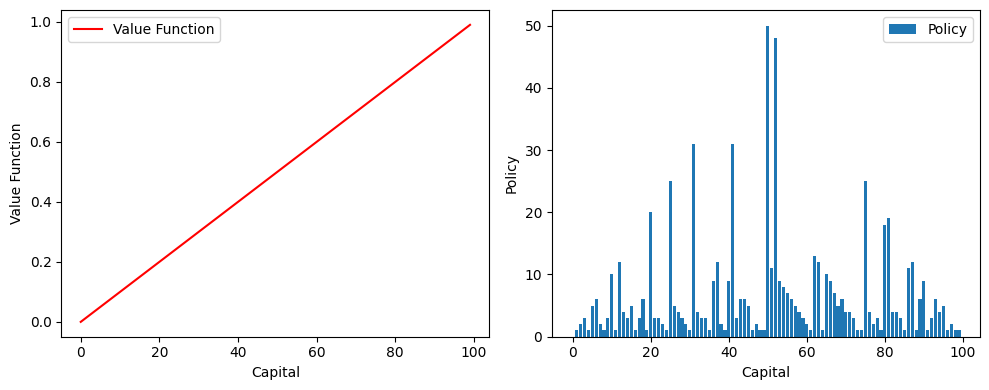

Probability for heads: 0.6

Policy Iteration
Number of iterations: 12


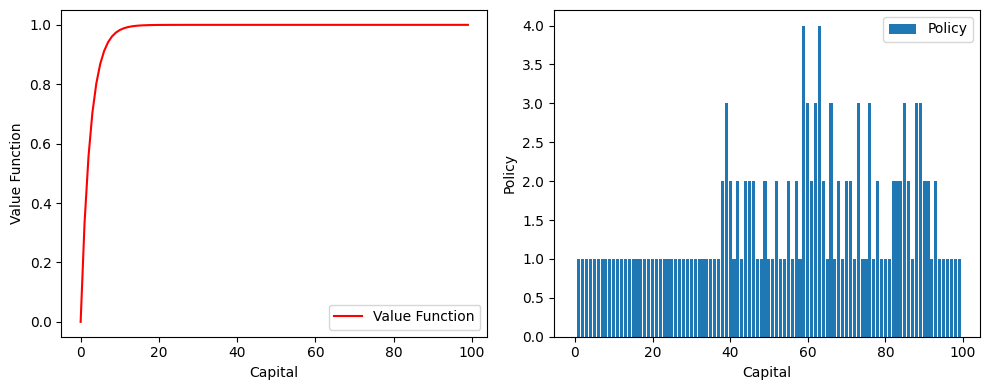

Value Iteration
Number of iterations: 100


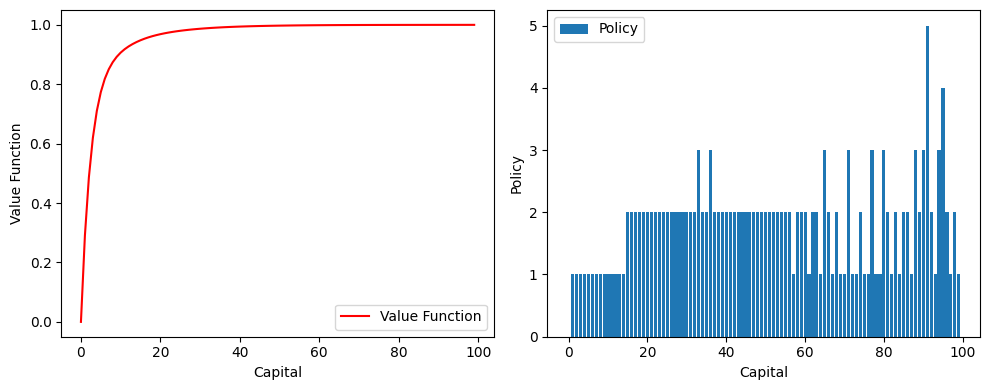

Probability for heads: 0.7

Policy Iteration
Number of iterations: 12


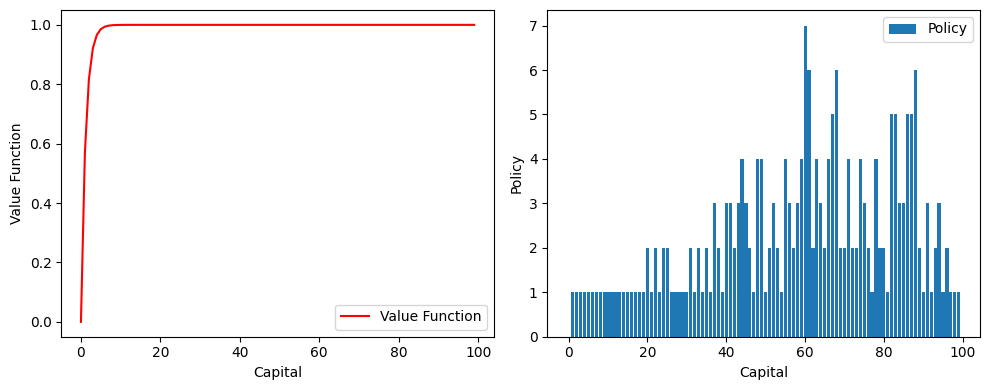

Value Iteration
Number of iterations: 100


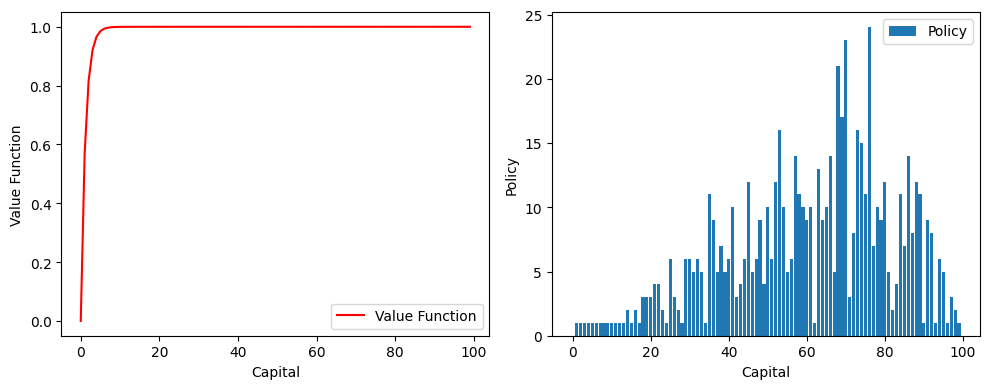

Probability for heads: 0.8

Policy Iteration
Number of iterations: 12


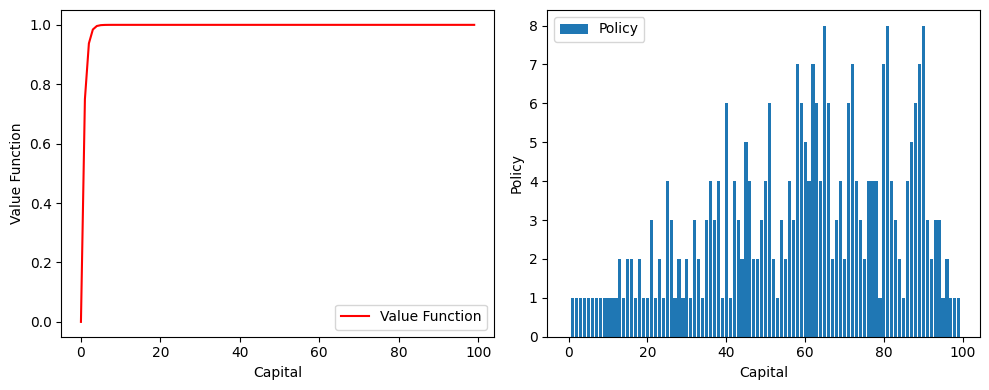

Value Iteration
Number of iterations: 52


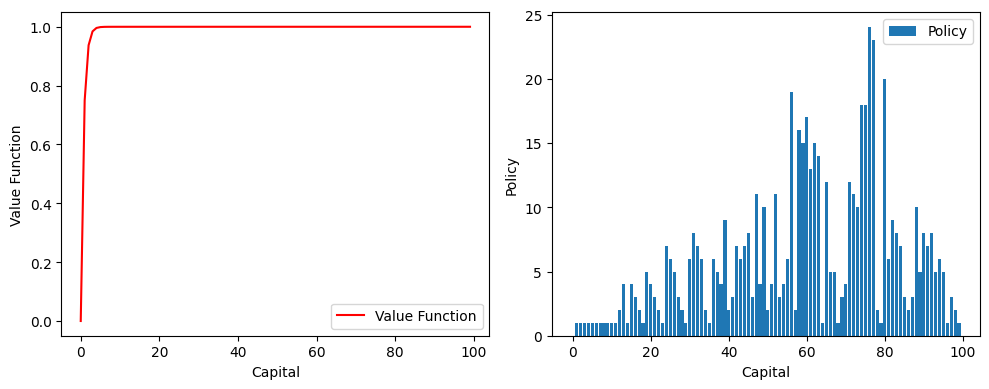

Probability for heads: 0.9

Policy Iteration
Number of iterations: 12


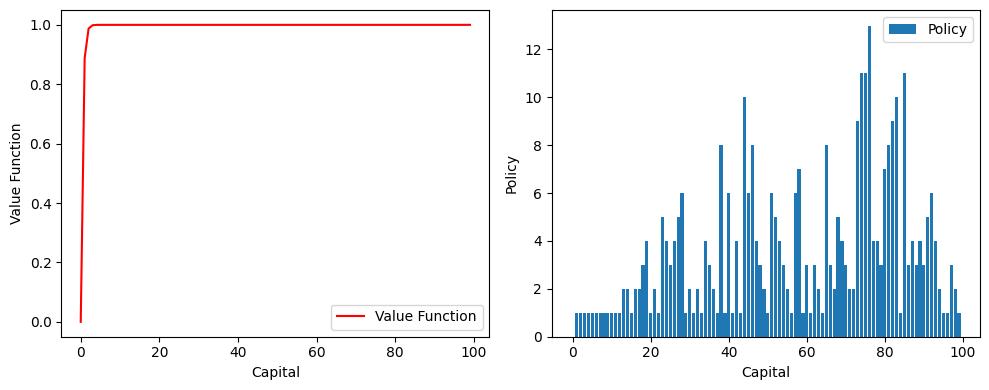

Value Iteration
Number of iterations: 31


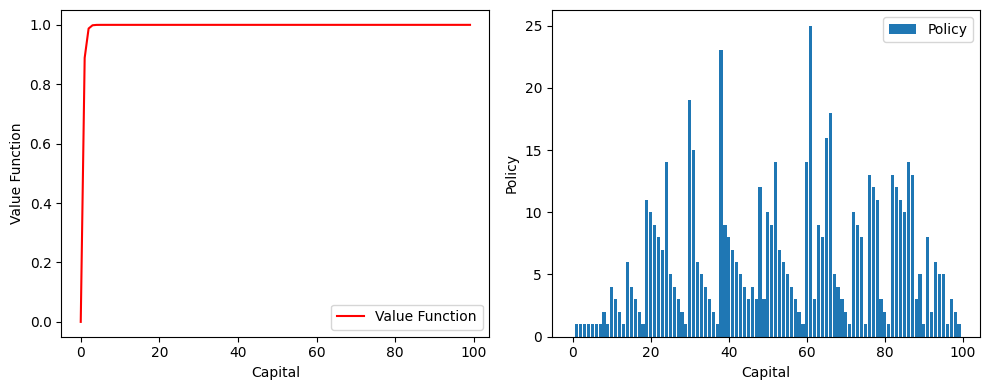

Probability for heads: 1.0

Policy Iteration
Number of iterations: 9


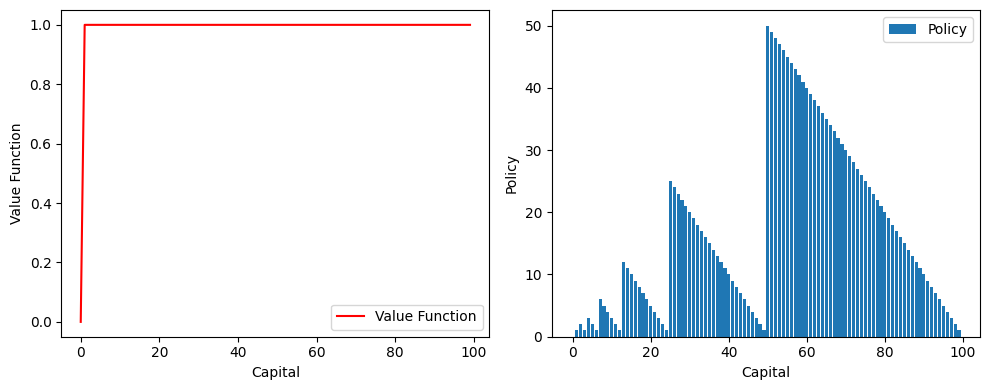

Value Iteration
Number of iterations: 8


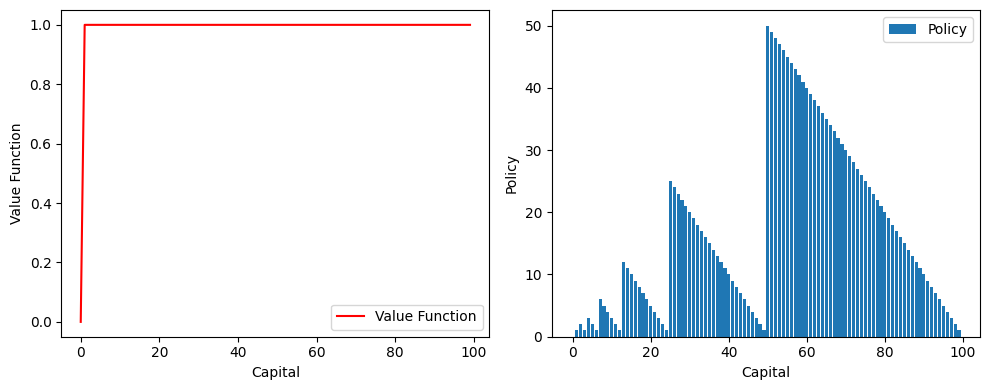

In [ ]:
for ph in range (1, 11):
  prob_h = ph / 10.0
  print("Probability for heads:", prob_h)
  print("")
  print("Policy Iteration")
  policy_iteration(probability_heads=prob_h)
  print("Value Iteration")
  value_iteration(probability_heads=prob_h)

Varying the discount rate

Discount Rate: 0.1

Policy Iteration
Number of iterations: 6


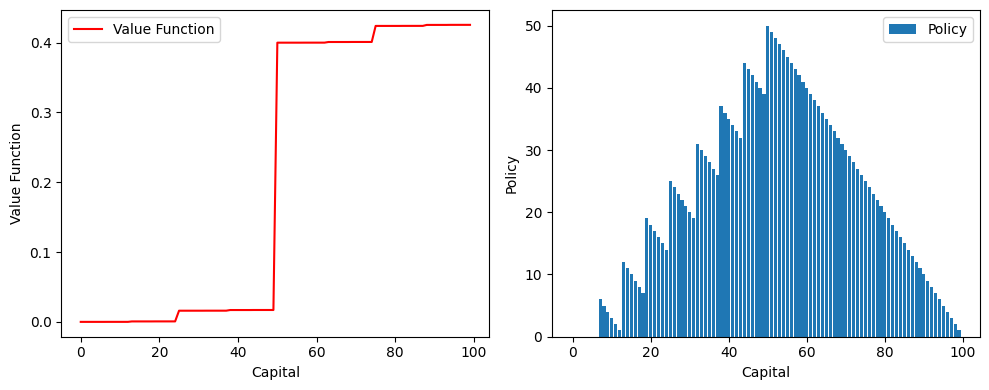

Value Iteration
Number of iterations: 5


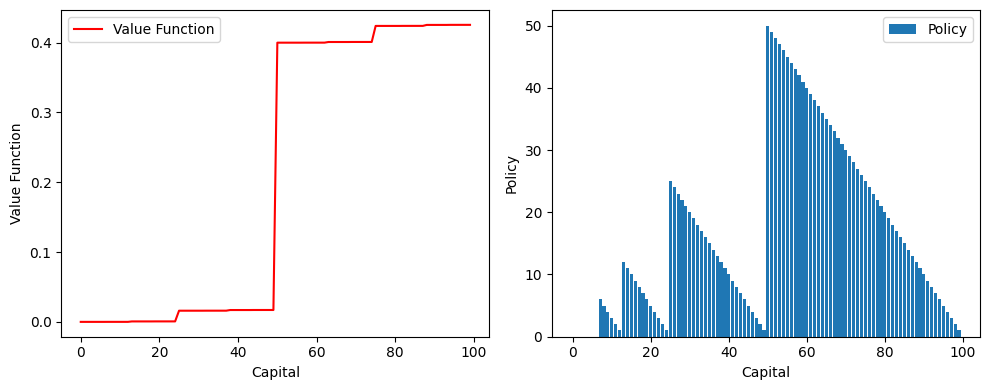

Discount Rate: 0.2

Policy Iteration
Number of iterations: 7


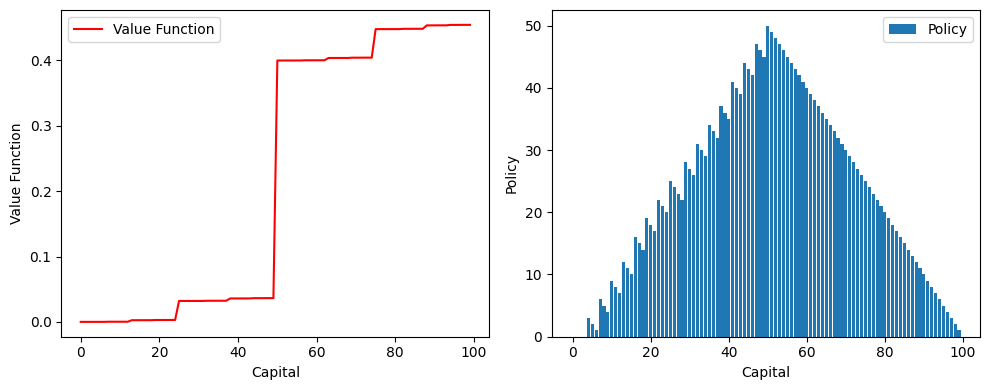

Value Iteration
Number of iterations: 6


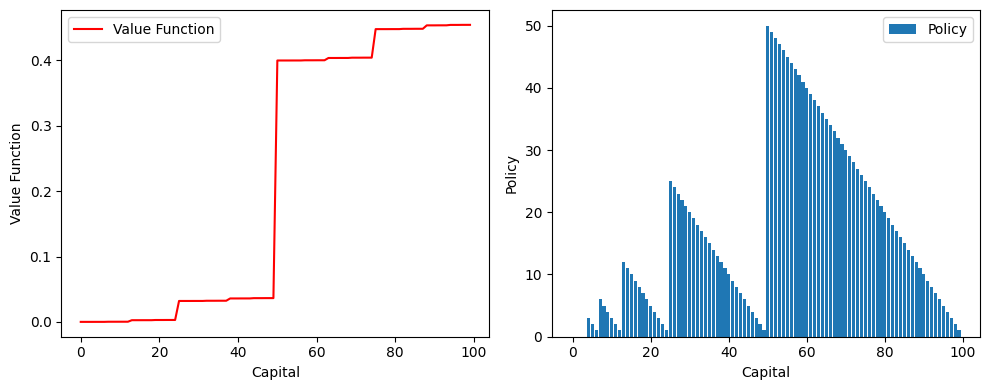

Discount Rate: 0.3

Policy Iteration
Number of iterations: 8


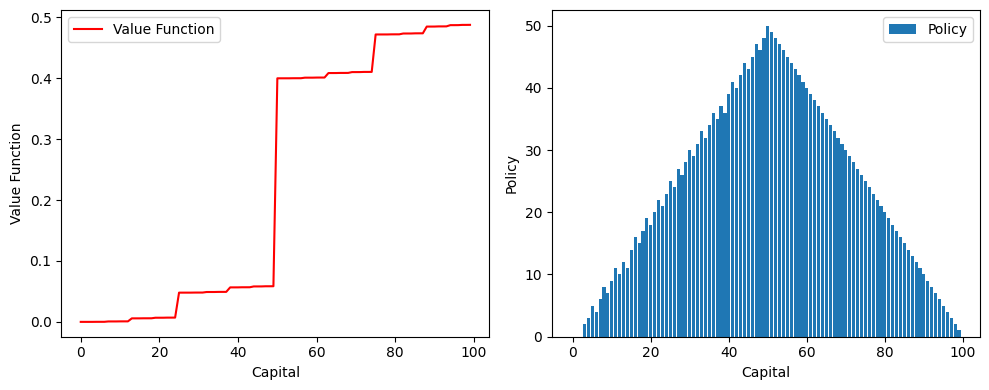

Value Iteration
Number of iterations: 7


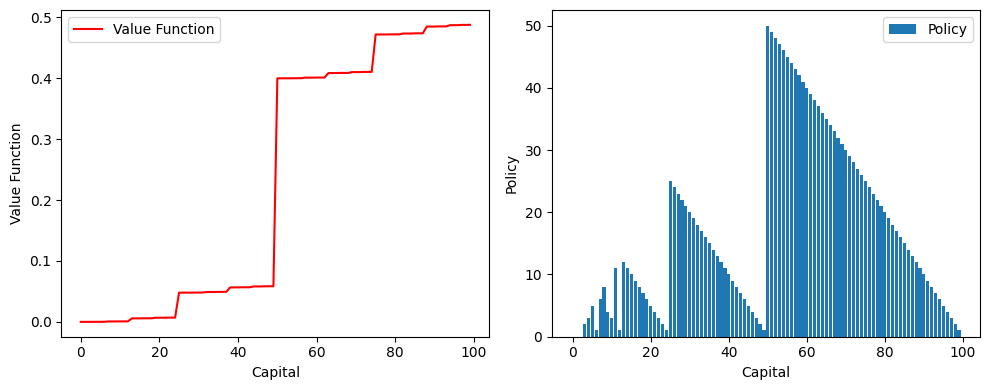

Discount Rate: 0.4

Policy Iteration
Number of iterations: 8


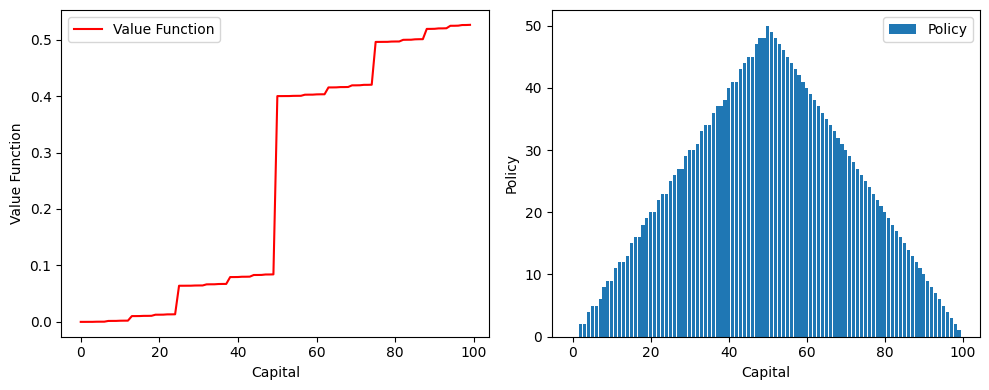

Value Iteration
Number of iterations: 7


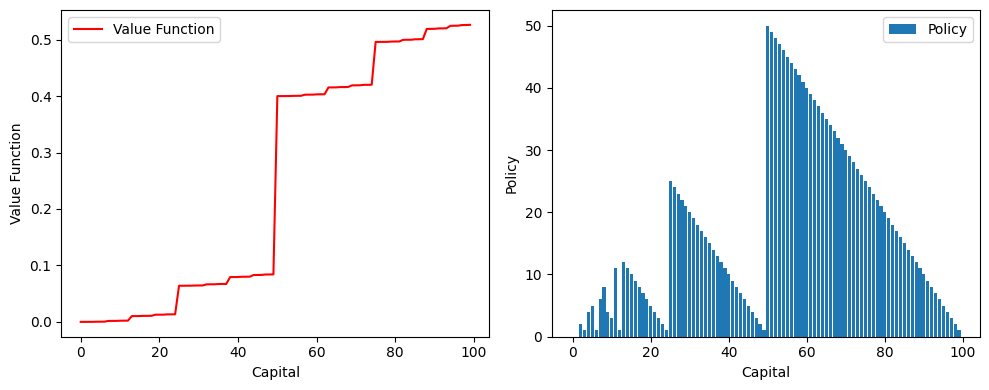

Discount Rate: 0.5

Policy Iteration
Number of iterations: 9


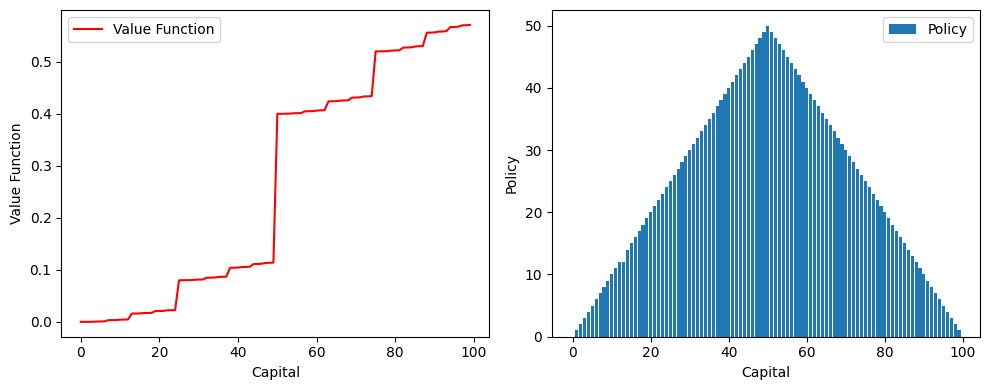

Value Iteration
Number of iterations: 8


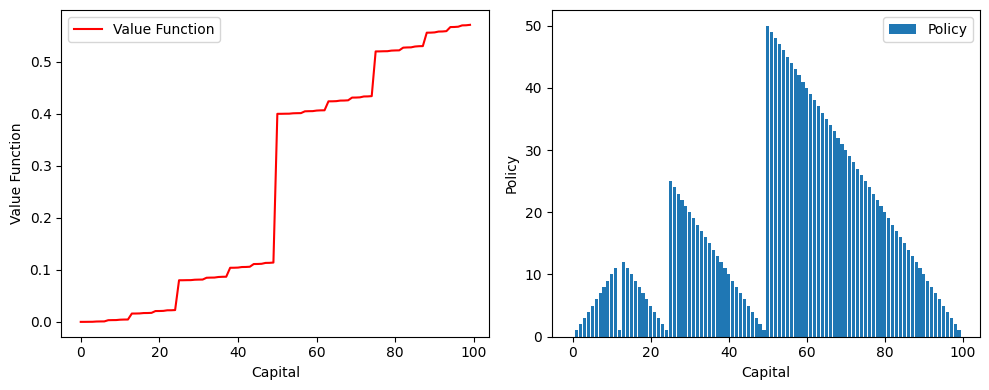

Discount Rate: 0.6

Policy Iteration
Number of iterations: 9


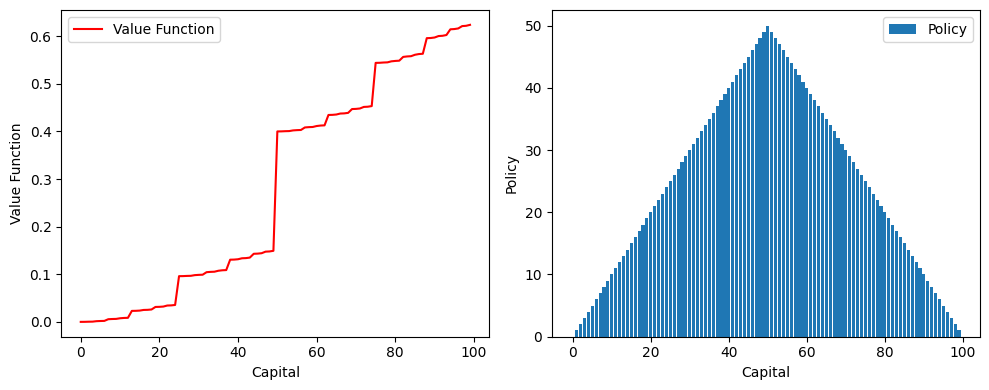

Value Iteration
Number of iterations: 8


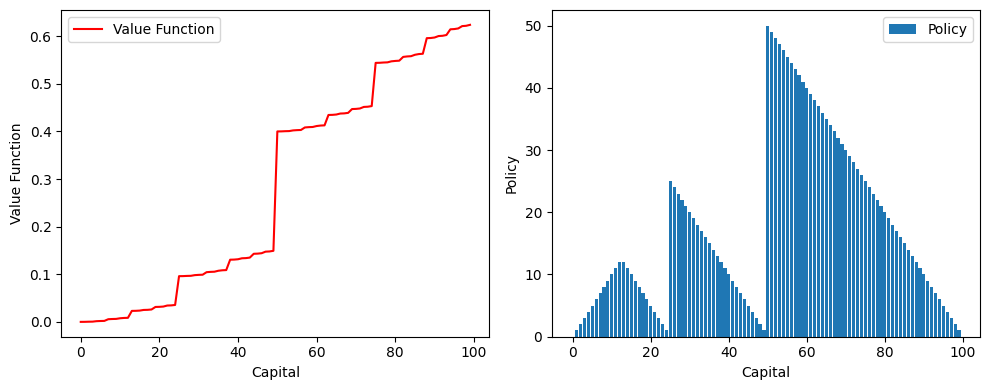

Discount Rate: 0.7

Policy Iteration
Number of iterations: 9


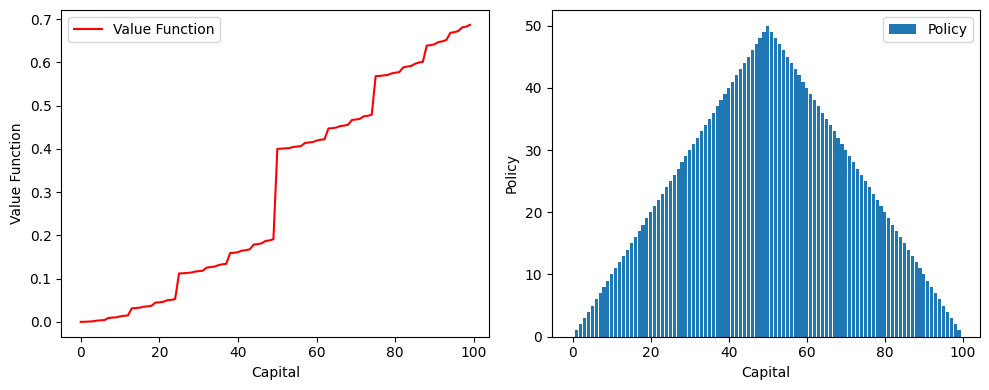

Value Iteration
Number of iterations: 9


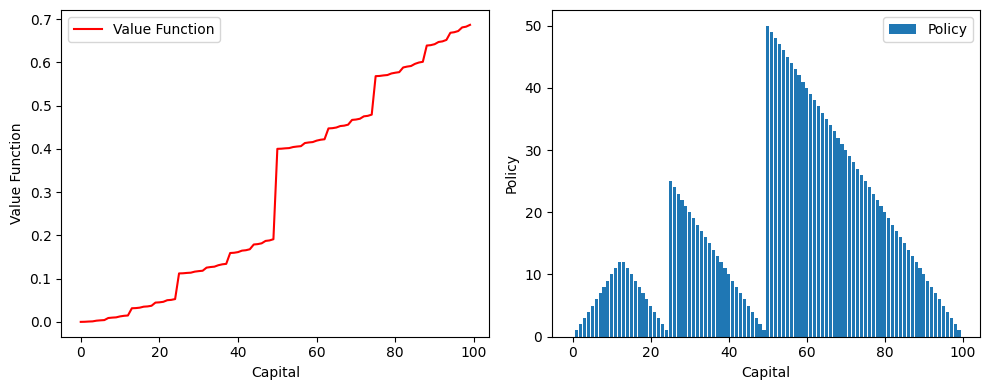

Discount Rate: 0.8

Policy Iteration
Number of iterations: 9


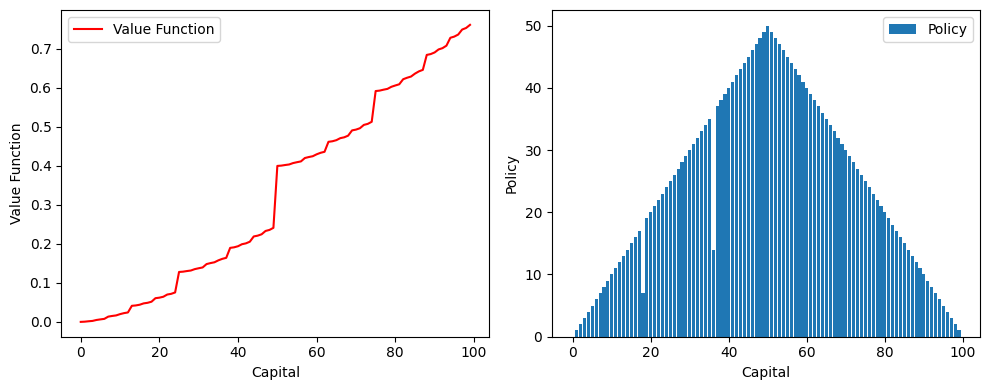

Value Iteration
Number of iterations: 10


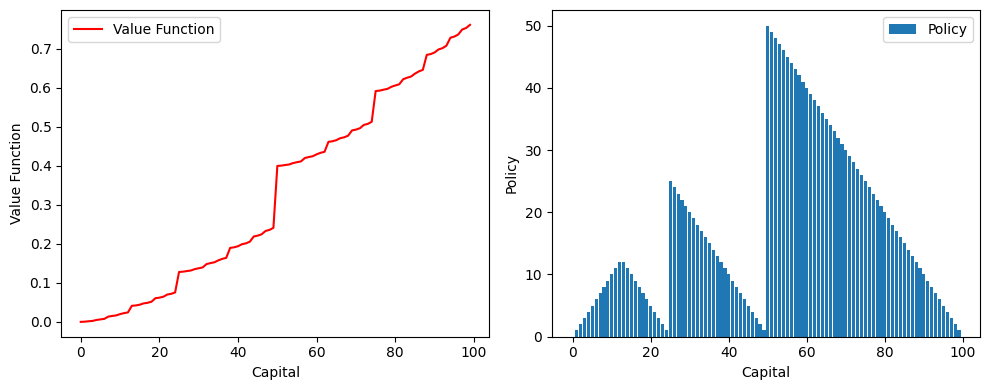

Discount Rate: 0.9

Policy Iteration
Number of iterations: 9


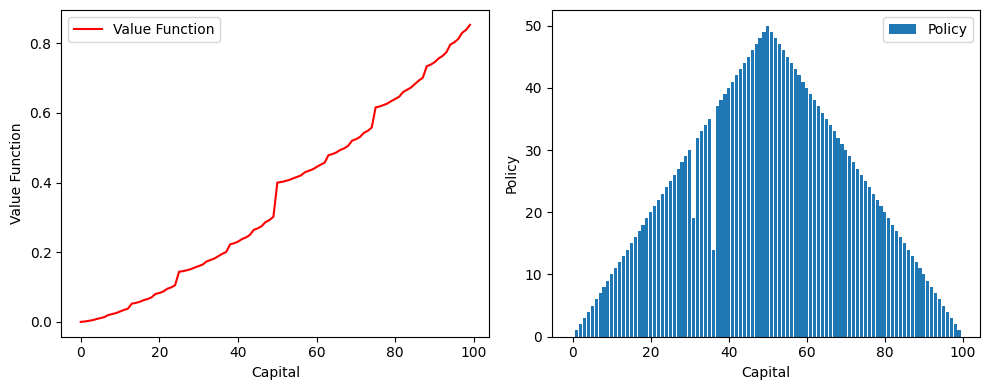

Value Iteration
Number of iterations: 11


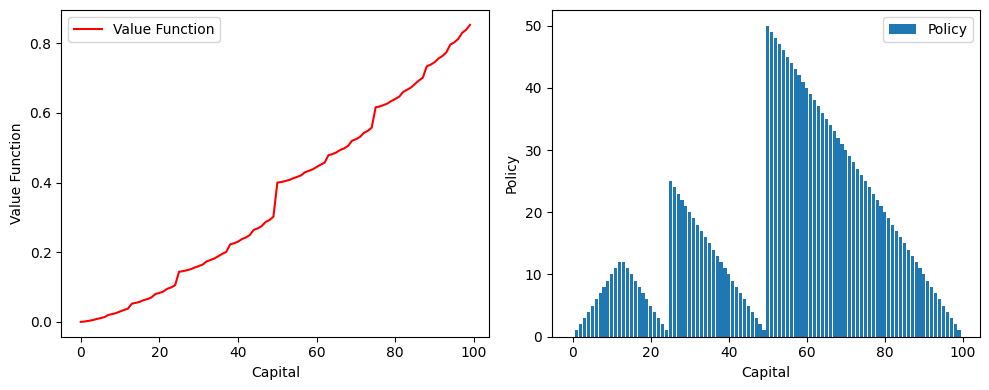

Discount Rate: 1.0

Policy Iteration
Number of iterations: 9


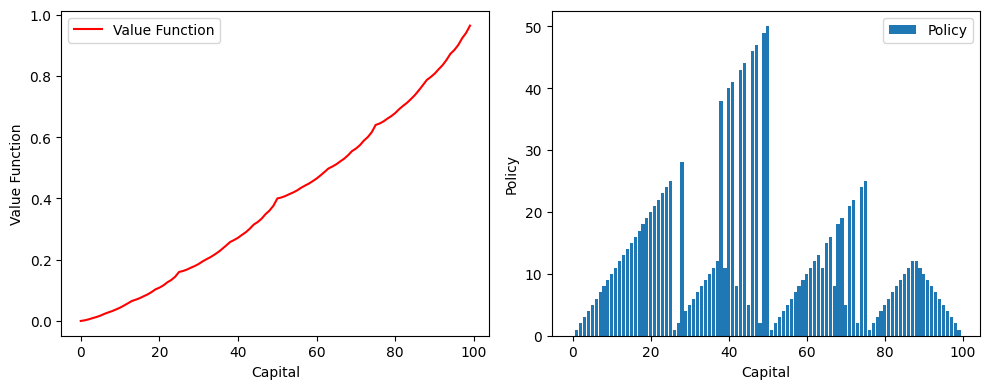

Value Iteration
Number of iterations: 11


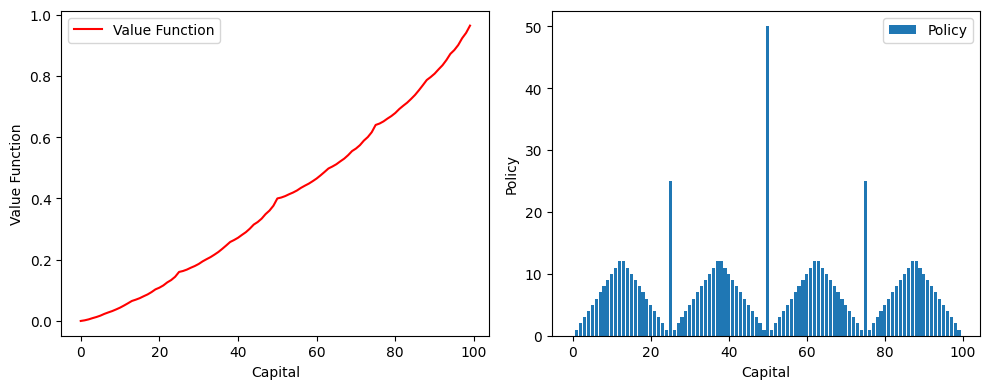

In [ ]:
for dr in range (1, 11):
  disc_r = dr / 10.0
  print("Discount Rate:", disc_r)
  print("")
  print("Policy Iteration")
  policy_iteration(discount_factor=disc_r)
  print("Value Iteration")
  value_iteration(discount_factor=disc_r)

Varying the rewards

Rewards: (0.1,1)

Value Iteration
Number of iterations: 100


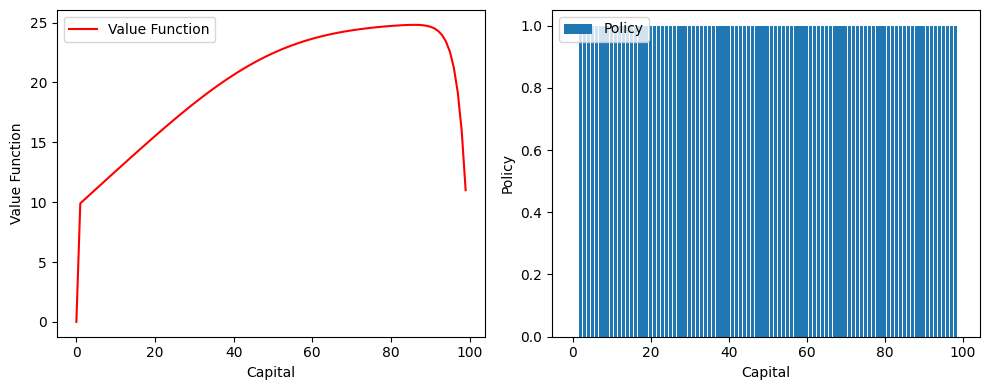

Rewards: (-0.1,1)

Value Iteration
Number of iterations: 6


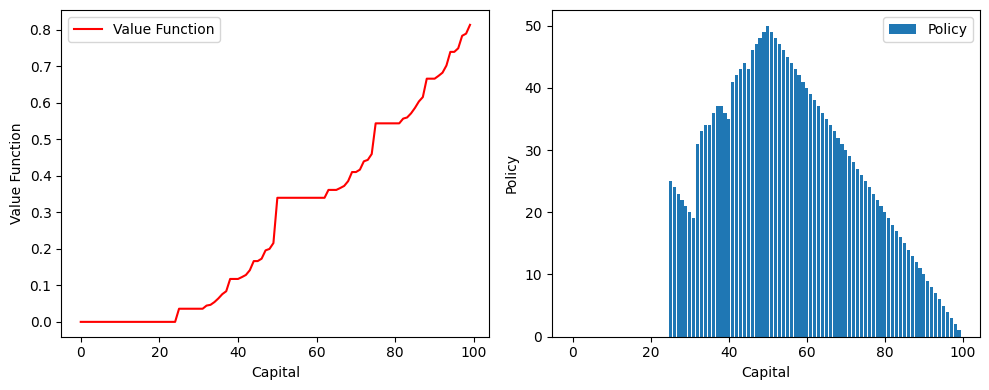

In [ ]:
rewards = [0.1, -0.1]
for r in rewards:
  print("Rewards:", "("+str(r)+",1)")
  print("")
  print("Value Iteration")
  value_iteration(reward=r)

Rewards: (0.1,1)

Policy Iteration
Number of iterations: 18


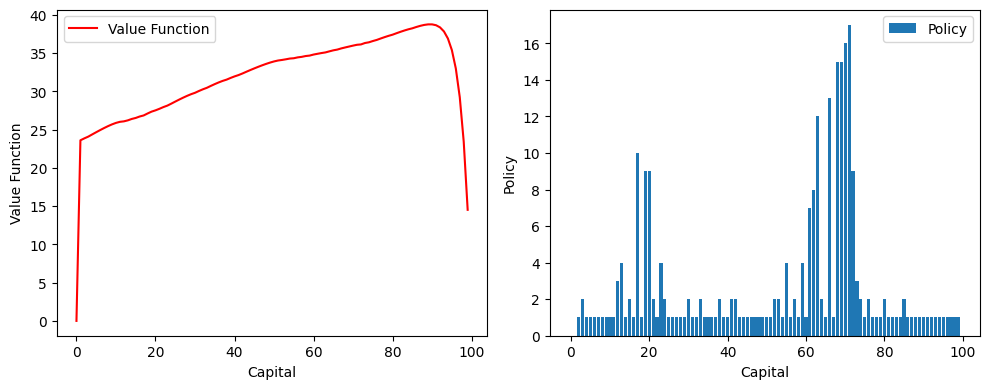

Rewards: (-0.1,1)

Policy Iteration
Number of iterations: 5


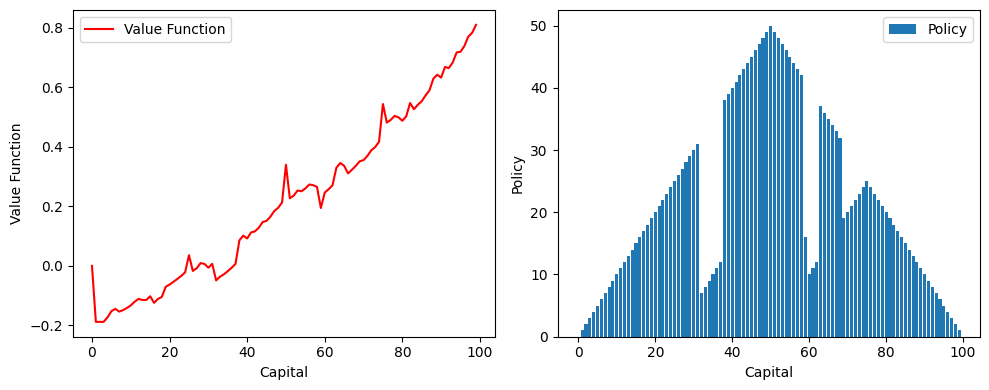

In [ ]:
rewards = [0.1, -0.1]
for r in rewards:
  print("Rewards:", "("+str(r)+",1)")
  print("")
  print("Policy Iteration")
  policy_iteration(epsilon_threshold=0.15,reward=r)